# ImageClassification_Cifar10

## Loading and Preprocessing the Cifar10 Dataset

In [1]:
# Import libraries

from random import randint

import cv2
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import libraries 

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Load Cifer10 dataset

cifer_10 = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifer_10.load_data()

In [4]:
# Shape of train and test data

train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
# Access first images

train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
train_labels[:20]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6]], dtype=uint8)

In [7]:
# Lookup list

lookup = [
    'Airplane',
    'Automobile',
    'Bird',
    'Cat',
    'Deer',
    'Dog',
    'Frog',
    'Horse',
    'Ship',
    'Truck'
]

### Displaying image

In [8]:
# Helper function that takes images, labels at random and display them

def show_img(images, labels, n_images):
    
    random_int = randint(0, labels.shape[0] - n_images)
    
    imgs, labels = images[random_int : random_int + n_images], \
        labels[random_int : random_int + n_images]
    
    _, figs = plt.subplots(1, n_images, figsize=(n_images * 3, 3))
    
    for fig, img, label in zip(figs, imgs, labels):
        fig.imshow(img)
        ax = fig.axes
        
        ax.set_title(lookup[int(label)])
        
        ax.title.set_fontsize(20)
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

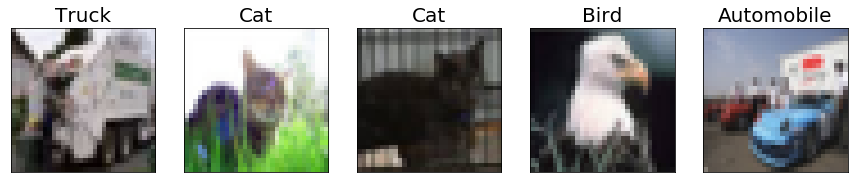

In [9]:
# Show 5 random train_images with their label

show_img(train_images, train_labels, 5)

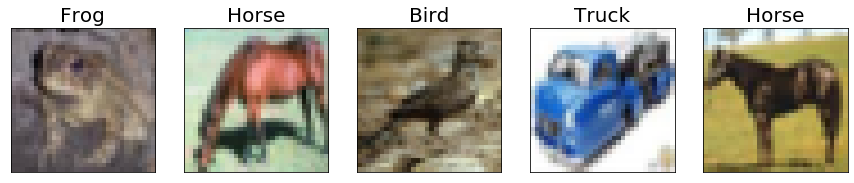

In [10]:
show_img(train_images, train_labels, 5)

### Saving images in respective folder

In [22]:
train_dir = './datasets/train/'
test_dir = './datasets/test/'

In [23]:
i = 0

for img, label in zip(train_images, train_labels):
    
    path = train_dir + str(lookup[int(label)])
    
    cv2.imwrite(os.path.join(path, str(i) + '.jpeg'), img)
    
    i += 1
    cv2.waitKey(0)

In [24]:
i = 0

for img, label in zip(test_images, test_labels):
    
    path = test_dir + str(lookup[int(label)])
    
    cv2.imwrite(os.path.join(path,str(i) + '.jpeg'), img)
    
    i += 1
    
    cv2.waitKey(0)

### Data Preparation
Format the images into appropriately pre-processed floating point tensors before feeding to the network:

Read images from the disk.
Decode contents of these images and convert it into proper grid format as per their RGB content.
Convert them into floating point tensors.
Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.
Fortunately, all these tasks can be done with the ImageDataGenerator class provided by tf.keras.

In [25]:
# Read the images,process and rescale them

train_image_generator = ImageDataGenerator(rescale=1./255)

test_image_generator = ImageDataGenerator(rescale=1./255)

After defining the generators for training and validation images, the flow_from_directory method loads images from the disk, applies rescaling, and resizes the images into the required dimension. We haven't applied any data augmentation techniques here, we'll work with the images as is.

In [26]:
batch_size = 64

In [27]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(32, 32))

Found 50000 images belonging to 10 classes.


In [28]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory=test_dir,
                                                         shuffle=True,
                                                         target_size=(32, 32))

Found 10000 images belonging to 10 classes.


In [29]:
sample_batch = next(train_data_gen)

sample_batch[0].shape

(64, 32, 32, 3)

### Building model

In [30]:
# Building the CNN Sequential model

conv_model = tf.keras.models.Sequential([
    
    layers.Conv2D(16, (3, 3), padding='same', activation='relu',
                  input_shape=sample_batch[0].shape[1:]),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
    
])

### Compile model

In [32]:
# Compile the CNN

conv_model.compile(optimizer='adam',
                   loss=tf.keras.losses.CategoricalCrossentropy(),
                   metrics=['accuracy'])

### Training model

In [33]:
# Training the model

training_hist = conv_model.fit(train_data_gen,
                               epochs=10,
                               steps_per_epoch=len(train_images) // batch_size,
                               validation_data=test_data_gen,
                               validation_steps=len(test_images) // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 781 steps, validate for 156 steps
Epoch 1/10
781/781 [==============================] - 181s 232ms/step - loss: 1.3128 - accuracy: 0.5241 - val_loss: 1.0537 - val_accuracy: 0.6297
Epoch 2/10
781/781 [==============================] - 193s 247ms/step - loss: 0.8519 - accuracy: 0.6981 - val_loss: 0.8534 - val_accuracy: 0.7030
Epoch 3/10
781/781 [==============================] - 225s 288ms/step - loss: 0.6374 - accuracy: 0.7738 - val_loss: 0.7456 - val_accuracy: 0.7411
Epoch 4/10
781/781 [==============================] - 177s 227ms/step - loss: 0.4472 - accuracy: 0.8438 - val_loss: 0.7553 - val_accuracy: 0.7506
Epoch 5/10
781/781 [==============================] - 184s 236ms/step - loss: 0.2789 - accuracy: 0.9006 - val_loss: 0.8766 - val_accuracy: 0.7467
Epoch 6/10
781/781 [==============================] - 200s 256ms/step - loss: 0.1719 - accuracy: 0.9400 - val_loss: 1.0806 - val_accuracy: 0.7377
Epoch 7/10
781/781 [==========

### Plotting accuracy and loss with epoch both for training and validation

Text(0.5, 1.0, 'Training and Validation Loss')

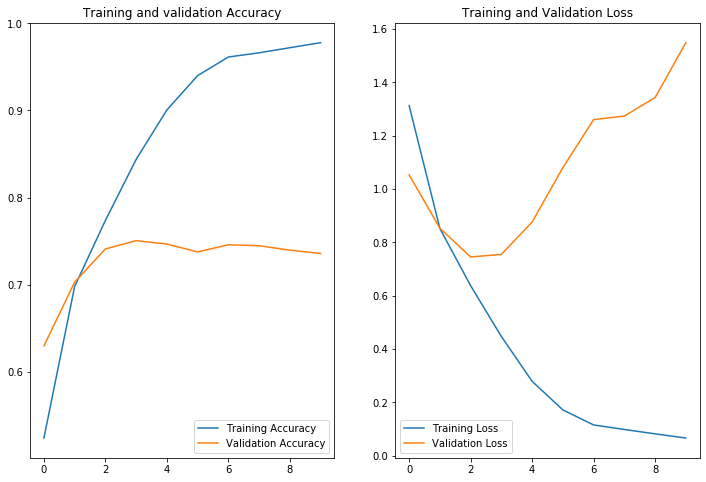

In [34]:
acc = training_hist.history['accuracy']
val_acc = training_hist.history['val_accuracy']

loss = training_hist.history['loss']
val_loss = training_hist.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

### Testing

In [35]:
# Helper function to display prediction results. 

def perform_test(model, img, label):
    plt.imshow(img)
    
    test_img = np.expand_dims(img, axis=0)
    result = model.predict(test_img)
    
    print('Actual label: ', lookup[int(label)])
    print('Predicted label: ', lookup[np.argmax(result)])

Actual label:  Cat
Predicted label:  Truck


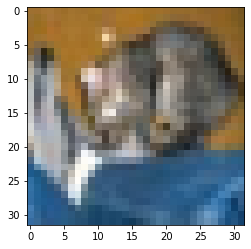

In [36]:
 # Call the perform_test function parse test_images and test_labels
perform_test(conv_model, test_images[0], test_labels[0])

Actual label:  Ship
Predicted label:  Ship


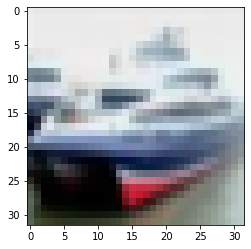

In [37]:
perform_test(conv_model, test_images[1], test_labels[1])

Actual label:  Airplane
Predicted label:  Airplane


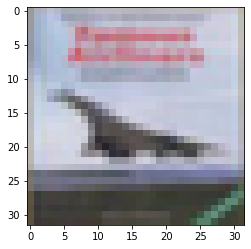

In [38]:
perform_test(conv_model, test_images[3], test_labels[3])

### Using Image Transformation and Dropout

Found 50000 images belonging to 10 classes.


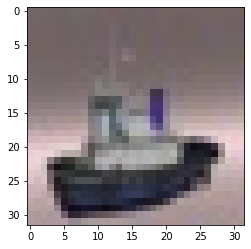

In [39]:
# Image Generator with flip pertubation

image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(32, 32))

plt.imshow(train_data_gen[0][0][0])

Found 50000 images belonging to 10 classes.


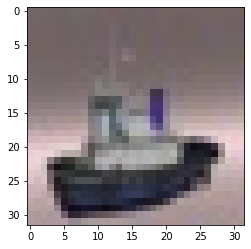

In [40]:
# Image Generator with rotation perturbation

image_gen = ImageDataGenerator(rescale=1./255, rotation_range=60)

train_train_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                           directory=train_dir,
                                           shuffle=True,
                                           target_size=(32, 32))

plt.imshow(train_data_gen[0][0][0])

Found 50000 images belonging to 10 classes.


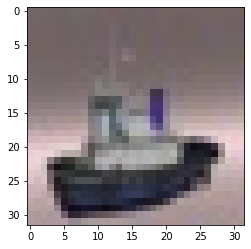

In [41]:
# Image Generator with zoom perturbation

image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_train_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                           directory=train_dir,
                                           shuffle=True,
                                           target_size=(32, 32))

plt.imshow(train_data_gen[0][0][0])

Found 50000 images belonging to 10 classes.


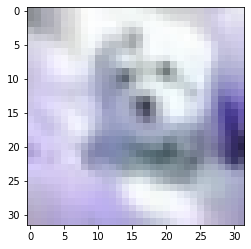

In [42]:
# Image Generator with perturbations

image_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=.05,
    height_shift_range=.05,
    horizontal_flip=True,
    zoom_range=0.3
)

train_data_gen_aug = image_gen.flow_from_directory(batch_size=batch_size,
                                                   directory=train_dir,
                                                   shuffle=True,
                                                   target_size=(32, 32))

plt.imshow(train_data_gen_aug[0][0][0])

### Building model with dropout

In [43]:
# Change the design of NN to include a dropout layer

conv_model_with_dropout = tf.keras.models.Sequential([
    
    layers.Conv2D(16, (3, 3), padding='same', activation='relu',
                 input_shape=sample_batch[0].shape[1:]),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Dropout(0.10),
    
    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    
    layers.Dropout(0.10),
    
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [44]:
# Compile the model

conv_model_with_dropout.compile(optimizer='adam',
                                loss=tf.keras.losses.CategoricalCrossentropy(),
                                metrics=['accuracy'])

In [45]:
# Train the model

training_hist = conv_model_with_dropout.fit(train_data_gen,
                                            epochs=10,
                                            steps_per_epoch=len(train_images) // batch_size,
                                            validation_data=test_data_gen,
                                            validation_steps=len(test_images) // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 781 steps, validate for 156 steps
Epoch 1/10
781/781 [==============================] - 254s 325ms/step - loss: 1.3916 - accuracy: 0.4882 - val_loss: 1.0683 - val_accuracy: 0.6175
Epoch 2/10
781/781 [==============================] - 246s 315ms/step - loss: 0.9392 - accuracy: 0.6666 - val_loss: 0.8531 - val_accuracy: 0.7004
Epoch 3/10
781/781 [==============================] - 218s 279ms/step - loss: 0.7549 - accuracy: 0.7352 - val_loss: 0.8053 - val_accuracy: 0.7221
Epoch 4/10
781/781 [==============================] - 212s 272ms/step - loss: 0.6377 - accuracy: 0.7774 - val_loss: 0.6848 - val_accuracy: 0.7631
Epoch 5/10
781/781 [==============================] - 215s 275ms/step - loss: 0.5437 - accuracy: 0.8119 - val_loss: 0.6565 - val_accuracy: 0.7727
Epoch 6/10
781/781 [==============================] - 248s 317ms/step - loss: 0.4760 - accuracy: 0.8334 - val_loss: 0.6862 - val_accuracy: 0.7709
Epoch 7/10
781/781 [==========

### Testing

Actual label:  Ship
Predicted label:  Airplane


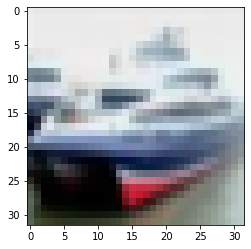

In [47]:
# Test

perform_test(conv_model_with_dropout, test_images[1], test_labels[1])

Actual label:  Airplane
Predicted label:  Airplane


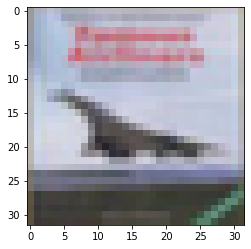

In [50]:
perform_test(conv_model_with_dropout, test_images[3], test_labels[3])

Actual label:  Airplane
Predicted label:  Airplane


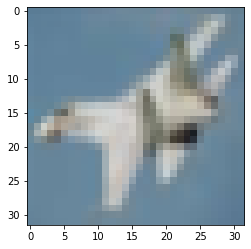

In [51]:
perform_test(conv_model_with_dropout, test_images[10], test_labels[10])

Actual label:  Dog
Predicted label:  Dog


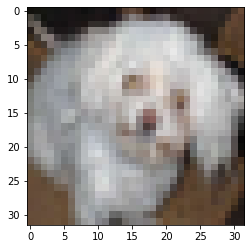

In [52]:
perform_test(conv_model_with_dropout, test_images[1000], test_labels[1000])